## fbprophet model building and forecasting using CO2 levels dataset

### Imports

In [1]:
import pandas as pd
import fbprophet
import matplotlib.pyplot
%matplotlib inline

Importing plotly failed. Interactive plots will not work.


### The Data

In [2]:
df = pd.read_excel('CO2 dataset.xlsx')

In [3]:
df['Year'] = pd.to_datetime(df['Year'], format='%Y')
df.columns = ['ds', 'y']
df.head()

,ds,y
0,1800-01-01,0.00568
1,1801-01-01,0.00561
2,1802-01-01,0.00555
3,1803-01-01,0.00548
4,1804-01-01,0.00542


In [4]:
from fbprophet import Prophet

In [5]:
model = Prophet()
model.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [6]:
model.seasonalities

OrderedDict([('yearly',
              {'period': 365.25,
               'fourier_order': 10,
               'prior_scale': 10.0,
               'mode': 'additive',
               'condition_name': None})])

In [7]:
model.component_modes

{'additive': ['yearly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [8]:
future_dates = model.make_future_dataframe(periods=10, freq="Y")

In [9]:
future_dates

,ds
0,1800-01-01
1,1801-01-01
2,1802-01-01
3,1803-01-01
4,1804-01-01
...,...
220,2019-12-31
221,2020-12-31
222,2021-12-31
223,2022-12-31


### Predictions 

In [10]:
predictions = model.predict(future_dates)

In [11]:
predictions

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1800-01-01,0.162572,-2.842334,0.440052,0.162572,0.162572,-1.387051,-1.387051,-1.387051,-1.387051,-1.387051,-1.387051,0.0,0.0,0.0,-1.224479
1,1801-01-01,0.178495,-2.472702,0.654904,0.178495,0.178495,-1.100718,-1.100718,-1.100718,-1.100718,-1.100718,-1.100718,0.0,0.0,0.0,-0.922224
2,1802-01-01,0.194417,-2.285666,0.914603,0.194417,0.194417,-0.812255,-0.812255,-0.812255,-0.812255,-0.812255,-0.812255,0.0,0.0,0.0,-0.617838
3,1803-01-01,0.210340,-1.874135,1.270600,0.210340,0.210340,-0.522011,-0.522011,-0.522011,-0.522011,-0.522011,-0.522011,0.0,0.0,0.0,-0.311671
4,1804-01-01,0.226263,-1.508958,1.737812,0.226263,0.226263,-0.230339,-0.230339,-0.230339,-0.230339,-0.230339,-0.230339,0.0,0.0,0.0,-0.004076
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,2019-12-31,18.356643,18.924117,22.059021,18.341359,18.371233,2.111526,2.111526,2.111526,2.111526,2.111526,2.111526,0.0,0.0,0.0,20.468170
221,2020-12-31,18.458322,18.097070,21.296671,18.437639,18.478575,1.236940,1.236940,1.236940,1.236940,1.236940,1.236940,0.0,0.0,0.0,19.695262
222,2021-12-31,18.559724,18.471877,21.795539,18.532143,18.585133,1.529668,1.529668,1.529668,1.529668,1.529668,1.529668,0.0,0.0,0.0,20.089392
223,2022-12-31,18.661125,18.851020,22.043151,18.627141,18.692377,1.821316,1.821316,1.821316,1.821316,1.821316,1.821316,0.0,0.0,0.0,20.482441


In [12]:
tail = predictions[['ds','yhat','yhat_lower','yhat_upper']].tail(20)

In [13]:
tail

,ds,yhat,yhat_lower,yhat_upper
205,2005-01-01,16.897472,15.456010,18.501191
206,2006-01-01,17.292332,15.723557,18.876165
207,2007-01-01,17.687549,16.110186,19.256467
208,2008-01-01,18.082762,16.424794,19.697288
209,2009-01-01,17.303356,15.720494,18.987012
210,2010-01-01,17.698215,16.191777,19.200027
211,2011-01-01,18.093432,16.625011,19.649198
212,2012-01-01,18.488645,16.778900,19.994312
213,2013-01-01,17.709239,16.184803,19.447678
214,2014-01-01,18.104099,16.538160,19.731771


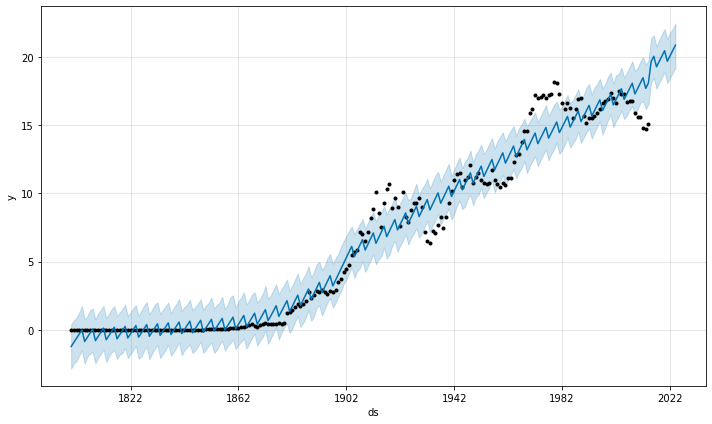

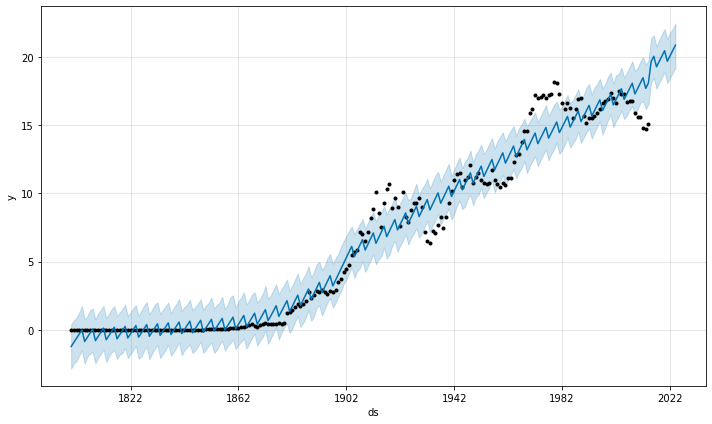

In [14]:
model.plot(predictions) # predictions

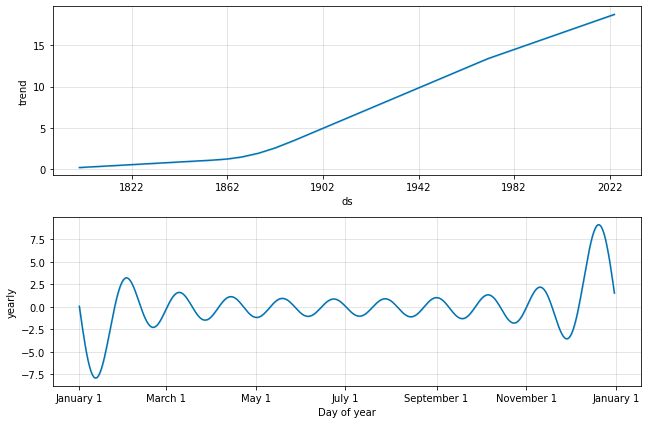

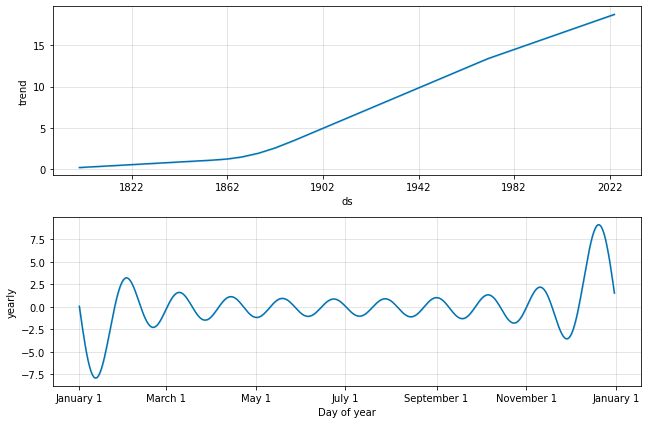

In [15]:
model.plot_components(predictions)